In [1]:
import numpy as np
import parameters as prm
import pickle

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
with open('./varying_subintervals/data/common_data.pkl','rb') as f:
    xout, tout, x_without_noise, euler_param, sim_param = pickle.load(f)
    
with open('./varying_subintervals/results/subint_1.pkl','rb') as f:
    error_list, theta_list, transformed_theta, em_param, data_param = pickle.load(f)

In [3]:
print(error_list)
print(theta_list)
print(transformed_theta)
print(transformed_theta.shape)

[5.9400504490801955, 0.0014688804215222614]
[array([[-0.05558032, -0.0455397 ],
       [-0.5598727 , -9.89513225],
       [ 2.48815003, -0.48717962],
       [-0.02485598, -0.02304977],
       [ 0.01735912,  0.01046931],
       [ 0.        ,  0.        ],
       [-0.38093843, -5.97333879],
       [-0.03063377, -0.51985929],
       [ 0.01841861, -0.02079226],
       [ 0.        ,  0.        ]]), array([[-0.05558032, -0.0455397 ],
       [-0.5598727 , -9.89513225],
       [ 2.48815003, -0.48717962],
       [-0.02485598, -0.02304977],
       [ 0.01735912,  0.01046931],
       [ 0.        ,  0.        ],
       [-0.38093843, -5.97333879],
       [-0.03063377, -0.51985929],
       [ 0.01841861, -0.02079226],
       [ 0.        ,  0.        ]])]
[[ 0.          0.          1.00126987  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -1.0231329   0.          0.          0.          0.
  -0.97286278 -0.1466496   0.          0.        ]]
(2, 10)


In [22]:
# true curve vs inferred curve
def estimated_function(theta, mesh):
    y = x
    index = 0

    for ts in range(x[0][0].shape[0]):
        for d in range(0, prm.num_hermite_terms):
            for j in range(0, d + 1):
                for i in range(0, d + 1):
                    if (i + j == d):
                        y[d] += theta[d, index] * np.power(x[0], i) * np.power(x[1], j)
                        index += 1
    return y
        
def true_function(x):
    y = x
    y[0, :] = x[1, :]
    y[1, :] = -x[0, :] -(x[0, :]**3)
    return y 

(2, 200)
(200,)


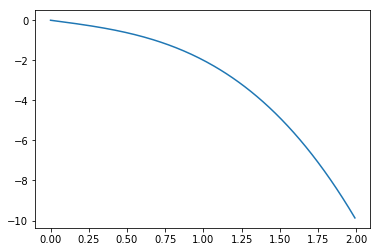

In [24]:
x = np.array([np.arange(0., 2., .01), np.arange(0., 2., .01)])
print(x.shape)

y_true = true_function(x)
print(y_true[0, :].shape)
plt.plot(y_true[0, :], y_true[1, :])

# y_est = estimated_function(transformed_theta, mesh)
# print(y_est)
# plt.plot(y_est[0], y_est[1])

In [6]:
x1 = np.array([np.arange(-20., 20., 1.), np.arange(-20., 20., 1.)])
x2 = np.array([np.arange(-20., 20., 2.), np.arange(-20., 20., 2.)])

plt.plot(x, true_function(sim_param, x), 'bo', x, estimated_function(transformed_theta, x), 'k')
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
# true curve vs inferred curve for varying number of subintervals
transformed_theta_list = []
for i in range(1, 11):
    with open('./varying_subintervals/results/subint_' + str(i) + '.pkl','rb') as f:
        _, _, transformed_theta, em_param, _ = pickle.load(f)
    transformed_theta_list.append((transformed_theta, em_param))
    
def true_function(x):
    return 1 + x - x**2

def estimated_function(theta, x):
    return (theta[0, 0] + theta[0, 1]*x + theta[0, 2]*(x**2) + theta[0, 3]*(x**3))

x1 = np.arange(-20.0, 20.0, 1)
x2 = np.arange(-20.0, 20.0, 1)

plt.plot(x1, true_function(x1), 'bo')

for theta in transformed_theta_list:
    plt.plot(x2, estimated_function(theta[0], x2), label = 'subintervals = ' + str(theta[1].numsubintervals))

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

In [ ]:
# error trajectories for verying number of subintervals
meta_error_list = []
for i in range(1, 11):
    with open('./varying_subintervals/results/subint_' + str(i) + '.pkl','rb') as f:
        error_list, _, _, em_param, _ = pickle.load(f)
    meta_error_list.append((error_list, em_param))

for error_list in meta_error_list:
    plt.plot(error_list[0], label = 'subintervals = ' + str(error_list[1].numsubintervals))

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

In [ ]:
for error_list in meta_error_list:
    print(error_list[0])